In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("C:\\Users\\HP\\Downloads\\market_pipe_thickness_loss_dataset.csv")
df.head()

Pipe_Size_mm  Thickness_mm      Material              Grade  \
0           800         15.48  Carbon Steel  ASTM A333 Grade 6   
1           800         22.00           PVC  ASTM A106 Grade B   
2           400         12.05  Carbon Steel         API 5L X52   
3          1500         38.72  Carbon Steel         API 5L X42   
4          1500         24.32          HDPE         API 5L X65   

   Max_Pressure_psi  Temperature_C  Corrosion_Impact_Percent  \
0               300           84.9                     16.04   
1               150           14.1                      7.38   
2              2500            0.6                      2.12   
3              1500           52.7                      5.58   
4              1500           11.7                     12.29   

   Thickness_Loss_mm  Material_Loss_Percent  Time_Years Condition  
0               4.91                  31.72           2  Moderate  
1               7.32                  33.27           4  Critical  
2               6.32                  52.45           7  Critical  
3               6.20                  16.01          19  Critical  
4               8.58                  35.28          20  Critical

In [7]:

df.info()


df.describe().T


print(df.isnull().sum().sort_values(ascending=False).head(30))


if 'equipment_id' in df.columns:
    print("Unique equipment:", df['equipment_id'].nunique())
    print(df['equipment_id'].value_counts().head())


if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    print("Timestamp min/max:", df['timestamp'].min(), df['timestamp'].max())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pipe_Size_mm              1000 non-null   int64  
 1   Thickness_mm              1000 non-null   float64
 2   Material                  1000 non-null   object 
 3   Grade                     1000 non-null   object 
 4   Max_Pressure_psi          1000 non-null   int64  
 5   Temperature_C             1000 non-null   float64
 6   Corrosion_Impact_Percent  1000 non-null   float64
 7   Thickness_Loss_mm         1000 non-null   float64
 8   Material_Loss_Percent     1000 non-null   float64
 9   Time_Years                1000 non-null   int64  
 10  Condition                 1000 non-null   object 
dtypes: float64(5), int64(3), object(3)
memory usage: 86.1+ KB
Pipe_Size_mm                0
Thickness_mm                0
Material                    0
Grade                     

In [6]:

print(df['Condition'].value_counts())


Condition
Critical    487
Moderate    299
Normal      214
Name: count, dtype: int64



First 5 Rows:
    Pipe_Size_mm  Thickness_mm      Material              Grade  \
0           800         15.48  Carbon Steel  ASTM A333 Grade 6   
1           800         22.00           PVC  ASTM A106 Grade B   
2           400         12.05  Carbon Steel         API 5L X52   
3          1500         38.72  Carbon Steel         API 5L X42   
4          1500         24.32          HDPE         API 5L X65   

   Max_Pressure_psi  Temperature_C  Corrosion_Impact_Percent  \
0               300           84.9                     16.04   
1               150           14.1                      7.38   
2              2500            0.6                      2.12   
3              1500           52.7                      5.58   
4              1500           11.7                     12.29   

   Thickness_Loss_mm  Material_Loss_Percent  Time_Years Condition  
0               4.91                  31.72           2  Moderate  
1               7.32                  33.27           4  Critical 

C:\Users\HP\AppData\Local\Temp\ipykernel_2552\3630302690.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Condition', palette="Set2")
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP\AppData\Local

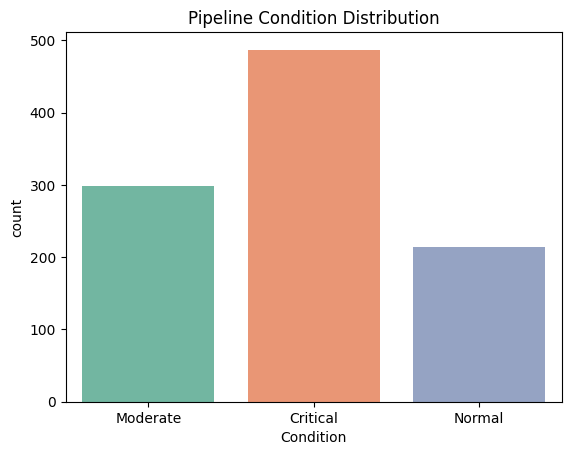

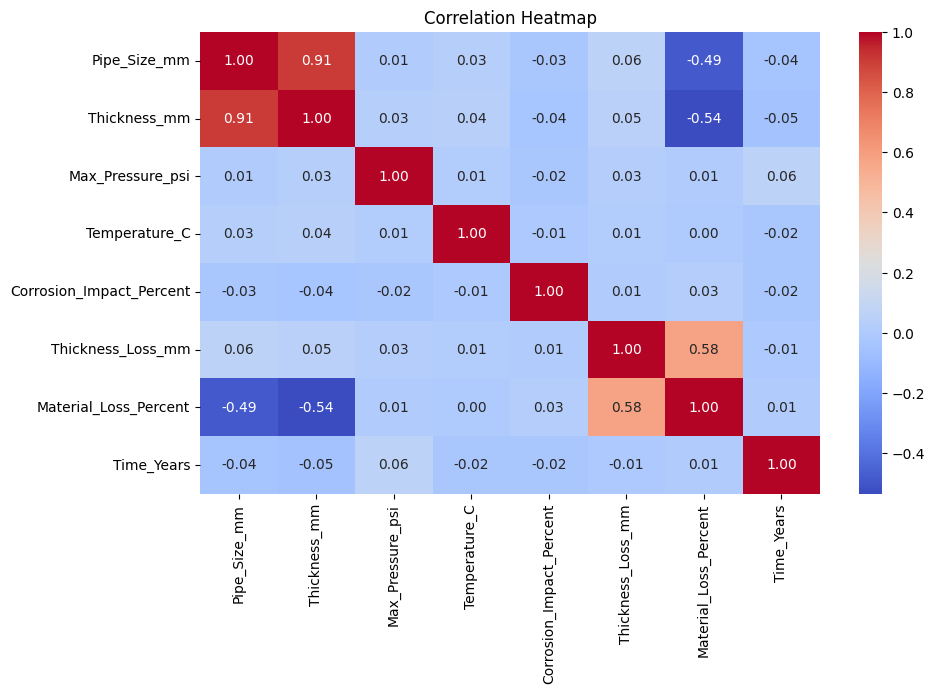

In [8]:
import seaborn as sns
print("\nFirst 5 Rows:\n", df.head())


print("\nCondition Distribution:\n", df['Condition'].value_counts())


print("\nNumerical Summary:\n", df.describe())


sns.countplot(data=df, x='Condition', palette="Set2")
plt.title("Pipeline Condition Distribution")
plt.show()


plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [12]:

df = df.drop_duplicates()


num_cols = df.select_dtypes(include=['float64','int64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


df_encoded = pd.get_dummies(df, columns=['Material','Grade'], drop_first=True)


df_encoded['Condition'] = df_encoded['Condition'].map({'Good':0,'Moderate':1,'Critical':2})


print(df_encoded.head())
print("Missing values after cleaning:", df_encoded.isnull().sum().sum())


   Pipe_Size_mm  Thickness_mm  Max_Pressure_psi  Temperature_C  \
0           800         15.48               300           84.9   
1           800         22.00               150           14.1   
2           400         12.05              2500            0.6   
3          1500         38.72              1500           52.7   
4          1500         24.32              1500           11.7   

   Corrosion_Impact_Percent  Thickness_Loss_mm  Material_Loss_Percent  \
0                     16.04               4.91                  31.72   
1                      7.38               7.32                  33.27   
2                      2.12               6.32                  52.45   
3                      5.58               6.20                  16.01   
4                     12.29               8.58                  35.28   

   Time_Years  Condition  Material_Fiberglass  Material_HDPE  Material_PVC  \
0           2        1.0                False          False         False   
1       

C:\Users\HP\AppData\Local\Temp\ipykernel_2552\1853887615.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_2552\1853887615.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [14]:
from sklearn.model_selection import train_test_split


X = df_encoded.drop('Condition', axis=1)


y = df_encoded['Condition']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (800, 16)
Test shape: (200, 16)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


rf_clf = RandomForestClassifier(
    n_estimators=200,        # number of trees
    random_state=42,
    class_weight='balanced'  # handles class imbalance
)


rf_clf.fit(X_train, y_train)


y_pred = rf_clf.predict(X_test)


print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        60
         2.0       1.00      1.00      1.00       140

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
 [[ 60   0]
 [  0 140]]


In [16]:

y_proba = rf_clf.predict_proba(X)  # shape: [n_samples, n_classes]


critical_index = list(rf_clf.classes_).index(2.0)


df['risk_score'] = y_proba[:, critical_index]


df[['Pipe_Size_mm', 'Thickness_mm', 'Time_Years', 'Condition', 'risk_score']].head()



Pipe_Size_mm  Thickness_mm  Time_Years Condition  risk_score
0           800         15.48           2  Moderate       0.075
1           800         22.00           4  Critical       0.985
2           400         12.05           7  Critical       1.000
3          1500         38.72          19  Critical       0.990
4          1500         24.32          20  Critical       1.000

In [17]:

def maintenance_action(score):
    if score > 0.8:
        return "Immediate Maintenance"
    elif score > 0.5:
        return "Schedule Maintenance"
    else:
        return "Monitor"


df['Maintenance_Action'] = df['risk_score'].apply(maintenance_action)


df[['Pipe_Size_mm', 'Thickness_mm', 'Time_Years', 'Condition', 'risk_score', 'Maintenance_Action']].head()



Pipe_Size_mm  Thickness_mm  Time_Years Condition  risk_score  \
0           800         15.48           2  Moderate       0.075   
1           800         22.00           4  Critical       0.985   
2           400         12.05           7  Critical       1.000   
3          1500         38.72          19  Critical       0.990   
4          1500         24.32          20  Critical       1.000   

      Maintenance_Action  
0                Monitor  
1  Immediate Maintenance  
2  Immediate Maintenance  
3  Immediate Maintenance  
4  Immediate Maintenance

In [19]:

df['Pipe_ID'] = df.index + 1


df[['Pipe_ID', 'Pipe_Size_mm', 'Thickness_mm', 'Time_Years', 'Condition', 'risk_score', 'Maintenance_Action', 'Estimated_Cost_USD']].head()



Pipe_ID  Pipe_Size_mm  Thickness_mm  Time_Years Condition  risk_score  \
0        1           800         15.48           2  Moderate       0.075   
1        2           800         22.00           4  Critical       0.985   
2        3           400         12.05           7  Critical       1.000   
3        4          1500         38.72          19  Critical       0.990   
4        5          1500         24.32          20  Critical       1.000   

      Maintenance_Action  Estimated_Cost_USD  
0                Monitor                   0  
1  Immediate Maintenance               50000  
2  Immediate Maintenance               50000  
3  Immediate Maintenance               50000  
4  Immediate Maintenance               50000

In [20]:
# Select Power BI columns
powerbi_df = df[[
    'Pipe_ID',
    'Pipe_Size_mm',
    'Thickness_mm',
    'Time_Years',
    'Condition',
    'risk_score',
    'Maintenance_Action',
    'Estimated_Cost_USD'
]].copy()


powerbi_df['risk_score'] = powerbi_df['risk_score'].round(3)       # Decimal number
powerbi_df['Estimated_Cost_USD'] = powerbi_df['Estimated_Cost_USD'].astype(int)  # Whole number
powerbi_df['Pipe_Size_mm'] = powerbi_df['Pipe_Size_mm'].astype(int)
powerbi_df['Thickness_mm'] = powerbi_df['Thickness_mm'].astype(float)
powerbi_df['Time_Years'] = powerbi_df['Time_Years'].astype(int)


powerbi_df.to_csv("Final_Pipeline_Risk_Dashboard.csv", index=False)

print("✅ CSV exported as 'Final_Pipeline_Risk_Dashboard.csv' — ready for Power BI ")


✅ CSV exported as 'Final_Pipeline_Risk_Dashboard.csv' — ready for Power BI 
